<a href="https://colab.research.google.com/github/basharataly/nyu-python-public-policy/blob/master/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [264]:

import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [265]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [266]:
df.set_index('complaint_type', inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
complaint_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Homeless Person Assistance,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
DOOR/WINDOW,1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109.0
Noise - Residential,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
Noise,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
Request Large Bulky Item Collection,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0


In [267]:
top10= df.groupby('complaint_type').size().nlargest(10).reset_index(name='count')
top10

,complaint_type,count
0,Noise - Residential,236350
1,HEAT/HOT WATER,205985
2,Illegal Parking,195159
3,Request Large Bulky Item Collection,177175
4,Blocked Driveway,145446
5,Noise - Street/Sidewalk,95977
6,Street Condition,93341
7,UNSANITARY CONDITION,81713
8,Water System,70509
9,Noise,59007


In [268]:
filtered=top10['complaint_type'].tolist()
filtered

['Noise - Residential',
 'HEAT/HOT WATER',
 'Illegal Parking',
 'Request Large Bulky Item Collection',
 'Blocked Driveway',
 'Noise - Street/Sidewalk',
 'Street Condition',
 'UNSANITARY CONDITION',
 'Water System',
 'Noise']

In [269]:
filtered_311=df.loc[filtered]
filtered_311.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
complaint_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Noise - Residential,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
Noise - Residential,11,11,39883376,08/01/2018 12:04:41 AM,08/01/2018 03:38:54 AM,NYPD,New York City Police Department,Loud Music/Party,Residential Building/House,10456,1041 FINDLAY AVENUE,FINDLAY AVENUE,EAST 165 STREET,EAST 166 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,08/01/2018 08:04:41 AM,The Police Department responded to the complai...,08/01/2018 03:38:54 AM,04 BRONX,2.024330e+09,BRONX,1007930.0,241405.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.829245,-73.914433,"(40.829244677725754, -73.91443331831667)",204.0
Noise - Residential,16,16,39886233,08/01/2018 12:06:29 AM,08/01/2018 02:54:24 AM,NYPD,New York City Police Department,Banging/Pounding,Residential Building/House,11693,82-01 BEACH CHANNEL DRIVE,BEACH CHANNEL DRIVE,BEACH 81 STREET,BEACH 83 STREET,NaN,NaN,ADDRESS,FAR ROCKAWAY,NaN,Precinct,Closed,08/01/2018 08:06:29 AM,The Police Department responded to the complai...,08/01/2018 02:54:24 AM,14 QUEENS,4.161140e+09,QUEENS,1037327.0,154262.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.589931,-73.808896,"(40.58993080750793, -73.80889570815852)",414.0
Noise - Residential,17,17,39881426,08/01/2018 12:06:42 AM,08/01/2018 04:00:03 AM,NYPD,New York City Police Department,Banging/Pounding,Residential Building/House,10457,1654 MONROE AVENUE,MONROE AVENUE,EAST MT EDEN AVENUE,EAST 173 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,08/01/2018 08:06:42 AM,The Police Department responded to the complai...,08/01/2018 04:00:03 AM,04 BRONX,2.027910e+09,BRONX,1010037.0,246441.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843061,-73.906800,"(40.84306113235555, -73.90680040695833)",204.0
Noise - Residential,18,18,39880309,08/01/2018 12:06:51 AM,08/01/2018 04:54:26 AM,NYPD,New York City Police Department,Loud Music/Party,Residential Building/House,11216,64 HERKIMER STREET,HERKIMER STREET,BEDFORD AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:06:51 AM,The Police Department responded to the complai...,08/01/2018 04:54:26 AM,03 BROOKLYN,3.018650e+09,BROOKLYN,997776.0,186919.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679716,-73.951234,"(40.67971590505359, -73.95123396494363)",303.0


In [0]:
filtered_311.created_date = pd.to_datetime(filtered_311.created_date, format='%m/%d/%Y %I:%M:%S %p')
filtered_311.closed_date= pd.to_datetime(filtered_311.closed_date, format='%m/%d/%Y %I:%M:%S %p')

In [271]:
filtered_311.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
complaint_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Noise - Residential,2,2,39882869,2018-08-01 00:00:54,2018-08-01 00:49:55,NYPD,New York City Police Department,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
Noise - Residential,11,11,39883376,2018-08-01 00:04:41,2018-08-01 03:38:54,NYPD,New York City Police Department,Loud Music/Party,Residential Building/House,10456,1041 FINDLAY AVENUE,FINDLAY AVENUE,EAST 165 STREET,EAST 166 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,08/01/2018 08:04:41 AM,The Police Department responded to the complai...,08/01/2018 03:38:54 AM,04 BRONX,2.024330e+09,BRONX,1007930.0,241405.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.829245,-73.914433,"(40.829244677725754, -73.91443331831667)",204.0
Noise - Residential,16,16,39886233,2018-08-01 00:06:29,2018-08-01 02:54:24,NYPD,New York City Police Department,Banging/Pounding,Residential Building/House,11693,82-01 BEACH CHANNEL DRIVE,BEACH CHANNEL DRIVE,BEACH 81 STREET,BEACH 83 STREET,NaN,NaN,ADDRESS,FAR ROCKAWAY,NaN,Precinct,Closed,08/01/2018 08:06:29 AM,The Police Department responded to the complai...,08/01/2018 02:54:24 AM,14 QUEENS,4.161140e+09,QUEENS,1037327.0,154262.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.589931,-73.808896,"(40.58993080750793, -73.80889570815852)",414.0
Noise - Residential,17,17,39881426,2018-08-01 00:06:42,2018-08-01 04:00:03,NYPD,New York City Police Department,Banging/Pounding,Residential Building/House,10457,1654 MONROE AVENUE,MONROE AVENUE,EAST MT EDEN AVENUE,EAST 173 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,08/01/2018 08:06:42 AM,The Police Department responded to the complai...,08/01/2018 04:00:03 AM,04 BRONX,2.027910e+09,BRONX,1010037.0,246441.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843061,-73.906800,"(40.84306113235555, -73.90680040695833)",204.0
Noise - Residential,18,18,39880309,2018-08-01 00:06:51,2018-08-01 04:54:26,NYPD,New York City Police Department,Loud Music/Party,Residential Building/House,11216,64 HERKIMER STREET,HERKIMER STREET,BEDFORD AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:06:51 AM,The Police Department responded to the complai...,08/01/2018 04:54:26 AM,03 BROOKLYN,3.018650e+09,BROOKLYN,997776.0,186919.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679716,-73.951234,"(40.67971590505359, -73.95123396494363)",303.0


In [272]:
filtered_311['year'] = filtered_311.created_date.dt.year
filtered_311['date'] = filtered_311.created_date.dt.date
filtered_311['month'] = filtered_311.created_date.dt.month
filtered_311['weekday_name'] = filtered_311.created_date.dt.weekday_name
filtered_311['weekday'] = filtered_311.created_date.dt.weekday
filtered_311['hour'] = filtered_311.created_date.dt.hour

filtered_311.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd,year,date,month,weekday_name,weekday,hour
complaint_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Noise - Residential,2,2,39882869,2018-08-01 00:00:54,2018-08-01 00:49:55,NYPD,New York City Police Department,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0,2018,2018-08-01,8,Wednesday,2,0
Noise - Residential,11,11,39883376,2018-08-01 00:04:41,2018-08-01 03:38:54,NYPD,New York City Police Department,Loud Music/Party,Residential Building/House,10456,1041 FINDLAY AVENUE,FINDLAY AVENUE,EAST 165 STREET,EAST 166 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,08/01/2018 08:04:41 AM,The Police Department responded to the complai...,08/01/2018 03:38:54 AM,04 BRONX,2.024330e+09,BRONX,1007930.0,241405.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.829245,-73.914433,"(40.829244677725754, -73.91443331831667)",204.0,2018,2018-08-01,8,Wednesday,2,0
Noise - Residential,16,16,39886233,2018-08-01 00:06:29,2018-08-01 02:54:24,NYPD,New York City Police Department,Banging/Pounding,Residential Building/House,11693,82-01 BEACH CHANNEL DRIVE,BEACH CHANNEL DRIVE,BEACH 81 STREET,BEACH 83 STREET,NaN,NaN,ADDRESS,FAR ROCKAWAY,NaN,Precinct,Closed,08/01/2018 08:06:29 AM,The Police Department responded to the complai...,08/01/2018 02:54:24 AM,14 QUEENS,4.161140e+09,QUEENS,1037327.0,154262.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.589931,-73.808896,"(40.58993080750793, -73.80889570815852)",414.0,2018,2018-08-01,8,Wednesday,2,0
Noise - Residential,17,17,39881426,2018-08-01 00:06:42,2018-08-01 04:00:03,NYPD,New York City Police Department,Banging/Pounding,Residential Building/House,10457,1654 MONROE AVENUE,MONROE AVENUE,EAST MT EDEN AVENUE,EAST 173 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,08/01/2018 08:06:42 AM,The Police Department responded to the complai...,08/01/2018 04:00:03 AM,04 BRONX,2.027910e+09,BRONX,1010037.0,246441.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843061,-73.906800,"(40.84306113235555, -73.90680040695833)",204.0,2018,2018-08-01,8,Wednesday,2,0
Noise - Residential,18,18,39880309,2018-08-01 00:06:51,2018-08-01 04:54:26,NYPD,New York City Police Department,Loud Music/Party,Residential Building/House,11216,64 HERKIMER STREET,HERKIMER STREET,BEDFORD AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:06:51 AM,The Police Department responded to the complai...,08/01/2018 04:54:26 AM,03 BROOKLYN,3.018650e+09,BROOKLYN,997776.0,186919.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679716,-73.951234,"(40.67971590505359, -73.95123396494363)",303.0,2018,2018-08-01,8,Wednesday,2,0


In [301]:
new_filtered_311=filtered_311.reset_index()
new_filtered_311.head()


,complaint_type,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd,year,date,month,weekday_name,weekday,hour
0,Noise - Residential,2,2,39882869,2018-08-01 00:00:54,2018-08-01 00:49:55,NYPD,New York City Police Department,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0,2018,2018-08-01,8,Wednesday,2,0
1,Noise - Residential,11,11,39883376,2018-08-01 00:04:41,2018-08-01 03:38:54,NYPD,New York City Police Department,Loud Music/Party,Residential Building/House,10456,1041 FINDLAY AVENUE,FINDLAY AVENUE,EAST 165 STREET,EAST 166 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,08/01/2018 08:04:41 AM,The Police Department responded to the complai...,08/01/2018 03:38:54 AM,04 BRONX,2.024330e+09,BRONX,1007930.0,241405.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.829245,-73.914433,"(40.829244677725754, -73.91443331831667)",204.0,2018,2018-08-01,8,Wednesday,2,0
2,Noise - Residential,16,16,39886233,2018-08-01 00:06:29,2018-08-01 02:54:24,NYPD,New York City Police Department,Banging/Pounding,Residential Building/House,11693,82-01 BEACH CHANNEL DRIVE,BEACH CHANNEL DRIVE,BEACH 81 STREET,BEACH 83 STREET,NaN,NaN,ADDRESS,FAR ROCKAWAY,NaN,Precinct,Closed,08/01/2018 08:06:29 AM,The Police Department responded to the complai...,08/01/2018 02:54:24 AM,14 QUEENS,4.161140e+09,QUEENS,1037327.0,154262.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.589931,-73.808896,"(40.58993080750793, -73.80889570815852)",414.0,2018,2018-08-01,8,Wednesday,2,0
3,Noise - Residential,17,17,39881426,2018-08-01 00:06:42,2018-08-01 04:00:03,NYPD,New York City Police Department,Banging/Pounding,Residential Building/House,10457,1654 MONROE AVENUE,MONROE AVENUE,EAST MT EDEN AVENUE,EAST 173 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,08/01/2018 08:06:42 AM,The Police Department responded to the complai...,08/01/2018 04:00:03 AM,04 BRONX,2.027910e+09,BRONX,1010037.0,246441.0,PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843061,-73.906800,"(40.84306113235555, -73.90680040695833)",204.0,2018,2018-08-01,8,Wednesday,2,0
4,Noise - Residential,18,18,39880309,2018-08-01 00:06:51,2018-08-01 04:54:26,NYPD,New York City Police Department,Loud Music/Party,Residential Building/House,11216,64 HERKIMER STREET,HERKIMER STREET,BEDFORD AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:06:51 AM,The Police Department responded to the complai...,08/01/2018 04:54:26 AM,03 BROOKLYN,3.018650e+09,BROOKLYN,997776.0,186919.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679716,-73.951234,"(40.67971590505359, -73.95123396494363)",303.0,2018,2018-08-01,8,Wednesday,2,0


In [0]:
noise_per_date_hour = new_filtered_311[['date', 'hour']][new_filtered_311.complaint_type == 'Noise - Residential'].groupby(['date', 'hour']).size().reset_index(name='count_requests')
noise2_res_hour = noise_per_date_hour.groupby('hour')['count_requests'].median().reset_index(name='median_requests')

heat_water_pdh = new_filtered_311[['date', 'hour']][new_filtered_311.complaint_type == 'HEAT/HOT WATER'].groupby(['date', 'hour']).size().reset_index(name='count_requests')
heat_hour =heat_water_pdh.groupby('hour')['count_requests'].median().reset_index(name='median_requests')

parking_pdh = new_filtered_311[['date', 'hour']][new_filtered_311.complaint_type == 'Illegal Parking'].groupby(['date', 'hour']).size().reset_index(name='count_requests')
parking_hour =parking_pdh.groupby('hour')['count_requests'].median().reset_index(name='median_requests')

bulky_pdh = new_filtered_311[['date', 'hour']][new_filtered_311.complaint_type == 'Request Large Bulky Item Collection'].groupby(['date', 'hour']).size().reset_index(name='count_requests')
bulky_hour =bulky_pdh.groupby('hour')['count_requests'].median().reset_index(name='median_requests')

blocked_pdh = new_filtered_311[['date', 'hour']][new_filtered_311.complaint_type == 'Blocked Driveway'].groupby(['date', 'hour']).size().reset_index(name='count_requests')
blocked_hour =blocked_pdh.groupby('hour')['count_requests'].median().reset_index(name='median_requests')

noisestreet_pdh = new_filtered_311[['date', 'hour']][new_filtered_311.complaint_type == 'Noise - Street/Sidewalk'].groupby(['date', 'hour']).size().reset_index(name='count_requests')
noise_street_hour =noisestreet_pdh.groupby('hour')['count_requests'].median().reset_index(name='median_requests')

streetcond_pdh = new_filtered_311[['date', 'hour']][new_filtered_311.complaint_type == 'Street Condition'].groupby(['date', 'hour']).size().reset_index(name='count_requests')
streetcond_hour =streetcond_pdh.groupby('hour')['count_requests'].median().reset_index(name='median_requests')

unsanitary_pdh = new_filtered_311[['date', 'hour']][new_filtered_311.complaint_type == 'UNSANITARY CONDITION'].groupby(['date', 'hour']).size().reset_index(name='count_requests')
unsanitary_hour =unsanitary_pdh.groupby('hour')['count_requests'].median().reset_index(name='median_requests')

watersystem_pdh = new_filtered_311[['date', 'hour']][new_filtered_311.complaint_type == 'Water System'].groupby(['date', 'hour']).size().reset_index(name='count_requests')
watersystem_hour =watersystem_pdh.groupby('hour')['count_requests'].median().reset_index(name='median_requests')

noise_pdh = new_filtered_311[['date', 'hour']][new_filtered_311.complaint_type == 'Noise'].groupby(['date', 'hour']).size().reset_index(name='count_requests')
Noise_hour =noise_pdh.groupby('hour')['count_requests'].median().reset_index(name='median_requests')


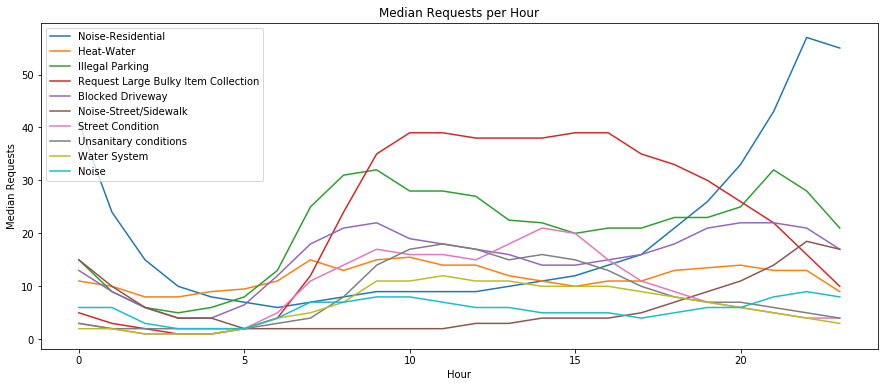

In [303]:
data = [noise2_res_hour, heat_hour, parking_hour, bulky_hour, blocked_hour , noise_street_hour , streetcond_hour , unsanitary_hour, watersystem_hour, noise_hour]
plt.figure(figsize=(15,6))
groups = ["Noise-Residential", "Heat-Water", "Illegal Parking", "Request Large Bulky Item Collection","Blocked Driveway","Noise-Street/Sidewalk","Street Condition","Unsanitary conditions","Water System","Noise"]

for dataframes in data:
  plt.plot(dataframes.hour, dataframes.median_requests)
  plt.legend(groups)
  plt.title('Median Requests per Hour')
  plt.xlabel('Hour')
  plt.ylabel('Median Requests')
  plt.grid()
  

In [0]:
noise_per_date_hour = new_filtered_311[['date', 'weekday']][new_filtered_311.complaint_type == 'Noise - Residential'].groupby(['date', 'weekday']).size().reset_index(name='count_requests')
noise2_res_week = noise_per_date_hour.groupby('weekday')['count_requests'].median().reset_index(name='median_requests')

heat_water_pdh = new_filtered_311[['date', 'weekday']][new_filtered_311.complaint_type == 'HEAT/HOT WATER'].groupby(['date', 'weekday']).size().reset_index(name='count_requests')
heat_week =heat_water_pdh.groupby('weekday')['count_requests'].median().reset_index(name='median_requests')

parking_pdh = new_filtered_311[['date', 'weekday']][new_filtered_311.complaint_type == 'Illegal Parking'].groupby(['date', 'weekday']).size().reset_index(name='count_requests')
parking_week =parking_pdh.groupby('weekday')['count_requests'].median().reset_index(name='median_requests')

bulky_pdh = new_filtered_311[['date', 'weekday']][new_filtered_311.complaint_type == 'Request Large Bulky Item Collection'].groupby(['date', 'weekday']).size().reset_index(name='count_requests')
bulky_week =bulky_pdh.groupby('weekday')['count_requests'].median().reset_index(name='median_requests')

blocked_pdh = new_filtered_311[['date', 'weekday']][new_filtered_311.complaint_type == 'Blocked Driveway'].groupby(['date', 'weekday']).size().reset_index(name='count_requests')
blocked_week =blocked_pdh.groupby('weekday')['count_requests'].median().reset_index(name='median_requests')

noisestreet_pdh = new_filtered_311[['date', 'weekday']][new_filtered_311.complaint_type == 'Noise - Street/Sidewalk'].groupby(['date', 'weekday']).size().reset_index(name='count_requests')
noise_street_week =noisestreet_pdh.groupby('weekday')['count_requests'].median().reset_index(name='median_requests')

streetcond_pdh = new_filtered_311[['date', 'weekday']][new_filtered_311.complaint_type == 'Street Condition'].groupby(['date', 'weekday']).size().reset_index(name='count_requests')
streetcond_week =streetcond_pdh.groupby('weekday')['count_requests'].median().reset_index(name='median_requests')

unsanitary_pdh = new_filtered_311[['date', 'weekday']][new_filtered_311.complaint_type == 'UNSANITARY CONDITION'].groupby(['date', 'weekday']).size().reset_index(name='count_requests')
unsanitary_week =unsanitary_pdh.groupby('weekday')['count_requests'].median().reset_index(name='median_requests')

watersystem_pdh = new_filtered_311[['date', 'weekday']][new_filtered_311.complaint_type == 'Water System'].groupby(['date', 'weekday']).size().reset_index(name='count_requests')
watersystem_week =watersystem_pdh.groupby('weekday')['count_requests'].median().reset_index(name='median_requests')

noise_pdh = new_filtered_311[['date', 'weekday']][new_filtered_311.complaint_type == 'Noise'].groupby(['date', 'weekday']).size().reset_index(name='count_requests')
Noise_week =noise_pdh.groupby('weekday')['count_requests'].median().reset_index(name='median_requests')

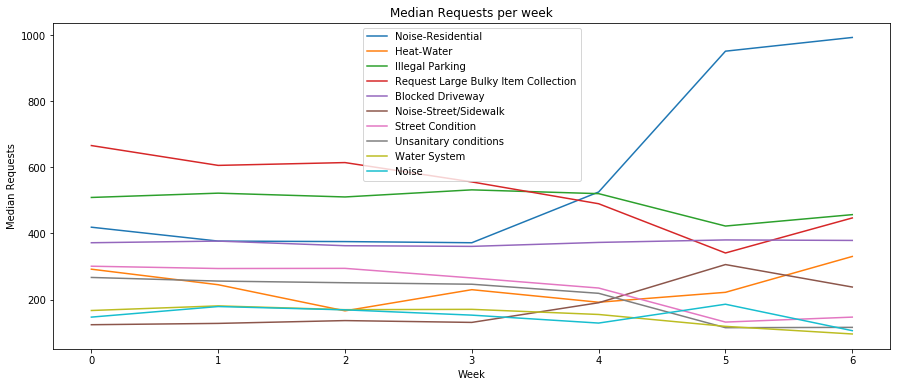

In [305]:
data2 = [noise2_res_week, heat_week, parking_week, bulky_week, blocked_week , noise_street_week , streetcond_week , unsanitary_week, watersystem_week, Noise_week]
plt.figure(figsize=(15,6))
groups = ["Noise-Residential", "Heat-Water", "Illegal Parking", "Request Large Bulky Item Collection","Blocked Driveway","Noise-Street/Sidewalk","Street Condition","Unsanitary conditions","Water System","Noise"]

for dataframes in data2:
  plt.plot(dataframes.weekday, dataframes.median_requests)
  plt.legend(groups)
  plt.title('Median Requests per week')
  plt.xlabel('Week')
  plt.ylabel('Median Requests')
  plt.grid()

In [0]:
noise_per_month_hour = new_filtered_311[['month', 'year']][new_filtered_311.complaint_type == 'Noise - Residential'].groupby(['month', 'year']).size().reset_index(name='count_requests')
noise2_res_month = noise_per_month_hour.groupby('month')['count_requests'].median().reset_index(name='median_requests')

heat_water_pdh = new_filtered_311[['month', 'year']][new_filtered_311.complaint_type == 'HEAT/HOT WATER'].groupby(['month', 'year']).size().reset_index(name='count_requests')
heat_month =heat_water_pdh.groupby('month')['count_requests'].median().reset_index(name='median_requests')

parking_pdh = new_filtered_311[['month', 'year']][new_filtered_311.complaint_type == 'Illegal Parking'].groupby(['month', 'year']).size().reset_index(name='count_requests')
parking_month =parking_pdh.groupby('month')['count_requests'].median().reset_index(name='median_requests')

bulky_pdh = new_filtered_311[['month', 'year']][new_filtered_311.complaint_type == 'Request Large Bulky Item Collection'].groupby(['month', 'year']).size().reset_index(name='count_requests')
bulky_month =bulky_pdh.groupby('month')['count_requests'].median().reset_index(name='median_requests')

blocked_pdh = new_filtered_311[['month', 'year']][new_filtered_311.complaint_type == 'Blocked Driveway'].groupby(['month', 'year']).size().reset_index(name='count_requests')
blocked_month =blocked_pdh.groupby('month')['count_requests'].median().reset_index(name='median_requests')

noisestreet_pdh = new_filtered_311[['month', 'year']][new_filtered_311.complaint_type == 'Noise - Street/Sidewalk'].groupby(['month', 'year']).size().reset_index(name='count_requests')
noise_street_month =noisestreet_pdh.groupby('month')['count_requests'].median().reset_index(name='median_requests')

streetcond_pdh = new_filtered_311[['month', 'year']][new_filtered_311.complaint_type == 'Street Condition'].groupby(['month', 'year']).size().reset_index(name='count_requests')
streetcond_month =streetcond_pdh.groupby('month')['count_requests'].median().reset_index(name='median_requests')

unsanitary_pdh = new_filtered_311[['month', 'year']][new_filtered_311.complaint_type == 'UNSANITARY CONDITION'].groupby(['month', 'year']).size().reset_index(name='count_requests')
unsanitary_month =unsanitary_pdh.groupby('month')['count_requests'].median().reset_index(name='median_requests')

watersystem_pdh = new_filtered_311[['month', 'year']][new_filtered_311.complaint_type == 'Water System'].groupby(['month', 'year']).size().reset_index(name='count_requests')
watersystem_month =watersystem_pdh.groupby('month')['count_requests'].median().reset_index(name='median_requests')

noise_pdh = new_filtered_311[['month', 'year']][new_filtered_311.complaint_type == 'Noise'].groupby(['month', 'year']).size().reset_index(name='count_requests')
Noise_month =noise_pdh.groupby('month')['count_requests'].median().reset_index(name='median_requests')



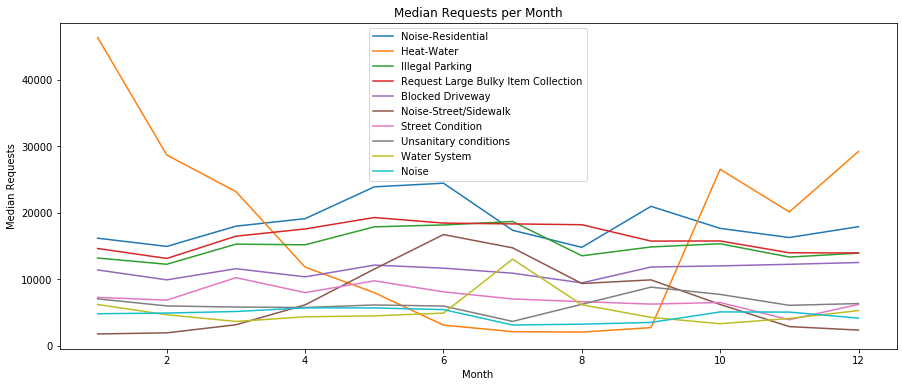

In [310]:
data = [noise2_res_month, heat_month, parking_month, bulky_month, blocked_month , noise_street_month , streetcond_month , unsanitary_month, watersystem_month, Noise_month]
plt.figure(figsize=(15,6))
groups = ["Noise-Residential", "Heat-Water", "Illegal Parking", "Request Large Bulky Item Collection","Blocked Driveway","Noise-Street/Sidewalk","Street Condition","Unsanitary conditions","Water System","Noise"]

for dataframes in data:
  plt.plot(dataframes.month, dataframes.median_requests)
  plt.legend(groups)
  plt.title('Median Requests per Month')
  plt.xlabel('Month')
  plt.ylabel('Median Requests')
  plt.grid()

#step 8 We can see that Residential noise complaints peaks up from around 5 p.m till midnight which maybe because that more people are in houses at that time and complain more. Similar situation for Residential noise can be seen at the weekends when most people are up. Heat water complaints spike up in winter months which is quite understandable as well.The remaining complaints show more or less similar trends for hours, days and months.